In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math
import uncertainties as unc


# Define the dimensions of the 2D array
rows = 3
cols = 3

# Initialize a 2D array with empty lists as elements
data = [[[] for _ in range(cols)] for _ in range(rows)]
for i in range(3):
    for j in range(3):
        data[i][j] = pd.read_csv('data'+str(i)+str(j)+'.csv')


# test fit

[[Model]]
    (Model(parabolic) - (Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 108
    # data points      = 41
    # variables        = 6
    chi-square         = 1.5135e-04
    reduced chi-square = 4.3241e-06
    Akaike info crit   = -500.890291
    Bayesian info crit = -490.608859
    R-squared          = 0.94569527
[[Variables]]
    a:             0 (fixed)
    b:             0 (fixed)
    c:             1 (fixed)
    p1_amplitude:  195725.157 +/- 24156.6036 (12.34%) (init = 250000.6)
    p1_center:     2.7791e+09 +/- 275291.666 (0.01%) (init = 2.7678e+09)
    p1_sigma:      2953874.73 +/- 468680.657 (15.87%) (init = 5118679)
    p2_amplitude:  352229.909 +/- 27026.5069 (7.67%) (init = 319260.1)
    p2_center:     2.7915e+09 +/- 236835.203 (0.01%) (init = 2.7889e+09)
    p2_sigma:      3856297.22 +/- 376784.786 (9.77%) (init = 4200594)
    p1_fwhm:       5907749.45 +/- 937361.316 (15

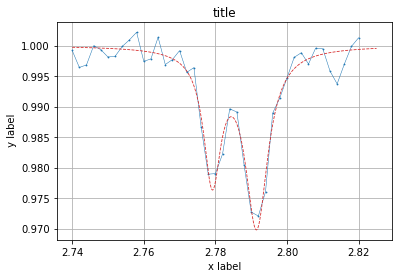

In [3]:
model1 = QuadraticModel() - (LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_'))

model = model1
params = model.make_params()

params['p1_center'].set(value=2.7678e9, vary=True)
params['p1_amplitude'].set(value=250000.636, min=0, vary=True)
params['p1_sigma'].set(value=5118679.32, vary=True)

params['p2_center'].set(value=2.7889e9, vary=True)
params['p2_amplitude'].set(value= 319260.128, min = 0,vary=True)
params['p2_sigma'].set(value=4200593.55, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=False)
params['c'].set(value=1, vary=False)

result = model.fit(data[0][0]['y'], params, x=data[0][0]['x'])
fit_x = np.linspace(2.74e9,2.825e9,2000)
fitlinein = result.eval(result.params, x = fit_x)

plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')

plt.plot(data[0][0]['x']/1e9, data[0][0]['y'],'C0o-',markersize = 0.8, linewidth = 0.5, label='Data in')
plt.plot(fit_x/1e9, fitlinein, 'C3--', linewidth = 0.8,label = 'best-fit line')
print(result.fit_report(show_correl=False))


In [4]:
# # Index = list(range(0,145))

# model0 = QuadraticModel() - (LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_'))
# fit_x = np.linspace(2.74e9,2.825e9,2000)

# model = [[[] for _ in range(cols)] for _ in range(rows)]
# params = [[[] for _ in range(cols)] for _ in range(rows)]
# result = [[[] for _ in range(cols)] for _ in range(rows)]
# fitline = [[[] for _ in range(cols)] for _ in range(rows)]

# for i in range(3):
#     for j in range(3):
#         model[i][j] = model0
#         params[i][j] = model[i][j].make_params()

#         params[i][j]['p1_center'].set(value=2.7678e9, vary=True)
#         params[i][j]['p1_amplitude'].set(value=250000.636, min=0, vary=True)
#         params[i][j]['p1_sigma'].set(value=5118679.32, vary=True)
#         params[i][j]['p2_center'].set(value=2.7889e9, vary=True)
#         params[i][j]['p2_amplitude'].set(value= 319260.128, min = 0,vary=True)
#         params[i][j]['p2_sigma'].set(value=4200593.55, vary=True)
#         params[i][j]['a'].set(value=0, vary=False)
#         params[i][j]['b'].set(value=0, vary=False)
#         params[i][j]['c'].set(value=1, vary=False)

#         result[i][j] = model[i][j].fit(data[0][0]['y'], params[i][j], x=data[0][0]['x'])
#         fitline[i][j] = result[i][j].eval(result[i][j].params, x = fit_x)
        


# plt.grid()
# plt.title('title')
# plt.xlabel(r'x label')
# plt.ylabel(r' y label')

# plt.plot(data[0][0]['x']/1e9, data[0][0]['y'],'C0o-',markersize = 0.8, linewidth = 0.5, label='Data')
# plt.plot(fit_x/1e9, fitline[0][0], 'C3--', linewidth = 0.8,label = 'best-fit line')

# print(result[0][0].fit_report(show_correl=False))

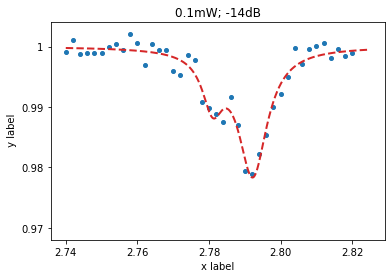

In [5]:

data2 = pd.read_csv('dataMore.csv')
model = QuadraticModel() - (LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_'))
fit_x = np.linspace(2.74e9,2.825e9,2000)

params = model.make_params()
params['p1_center'].set(value=2.7791e+09, vary=True)
params['p1_amplitude'].set(value=250000.636, min=0, vary=True)
params['p1_sigma'].set(value=5118679.32, vary=True)
params['p2_center'].set(value= 2.7915e+09, vary=True)
params['p2_amplitude'].set(value= 319260.128, min = 0,vary=True)
params['p2_sigma'].set(value=4200593.55, vary=True)
params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=False)
params['c'].set(value=1, vary=False)

result = model.fit(data2['y'], params, x=data2['x'])
fitline = result.eval(result.params, x = fit_x)
# plt.grid()
plt.title('0.1mW; -14dB')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
plt.ylim(0.968,1.004)
plt.yticks([0.97,0.98,0.99,1],[0.97,0.98,0.99,1])
plt.plot(data2['x']/1e9, data2['y'],'C0o',markersize = 4, linewidth = 2, label='Data')
plt.plot(fit_x/1e9, fitline, 'C3--', linewidth = 2,label = 'best-fit line')

# fit ODMR data

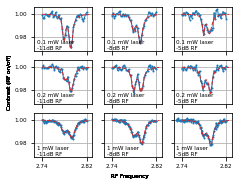

In [6]:
# Index = list(range(0,145))

model0 = QuadraticModel() - (LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_'))
fit_x = np.linspace(2.74e9,2.825e9,2000)

model = [[[] for _ in range(cols)] for _ in range(rows)]
params = [[[] for _ in range(cols)] for _ in range(rows)]
result = [[[] for _ in range(cols)] for _ in range(rows)]
fitline = [[[] for _ in range(cols)] for _ in range(rows)]
fwhm = [[[] for _ in range(cols)] for _ in range(rows)]

for i in range(3):
    for j in range(3):
        model[i][j] = model0
        params[i][j] = model[i][j].make_params()

        params[i][j]['p1_center'].set(value=2.7791e+09, vary=True)
        params[i][j]['p1_amplitude'].set(value=250000.636, min=0, vary=True)
        params[i][j]['p1_sigma'].set(value=5118679.32, vary=True)
        params[i][j]['p2_center'].set(value= 2.7915e+09, vary=True)
        params[i][j]['p2_amplitude'].set(value= 319260.128, min = 0,vary=True)
        params[i][j]['p2_sigma'].set(value=4200593.55, vary=True)
        params[i][j]['a'].set(value=0, vary=False)
        params[i][j]['b'].set(value=0, vary=False)
        params[i][j]['c'].set(value=1, vary=False)

        result[i][j] = model[i][j].fit(data[i][j]['y'], params[i][j], x=data[i][j]['x'])
        fitline[i][j] = result[i][j].eval(result[i][j].params, x = fit_x)
        fwhm[i][j] = (result[i][j].params.eval('p1_fwhm')+result[i][j].params.eval('p2_fwhm'))/2
        


# plt.grid()
# plt.title('title')
# plt.xlabel(r'x label')
# plt.ylabel(r' y label')

# plt.plot(data[0][0]['x']/1e9, data[0][0]['y'],'C0o-',markersize = 0.8, linewidth = 0.5, label='Data')
# plt.plot(fit_x/1e9, fitline[0][0], 'C3--', linewidth = 0.8,label = 'best-fit line')
plt.rcParams.update({'font.size': 5.67})
cm = 1/2.54 
fig, axs = plt.subplots(3,3,sharex=True, sharey=True, figsize=(9*cm, 7*cm))

for i in range(3):
    for j in range(3):
        if i == 0:
            p = '0.1 mW'
        if i == 1:
            p = '0.2 mW'
        if i == 2:
            p = '1 mW'

        if j == 0:
            rf = '-11dB'
        if j == 1:
            rf = '-8dB'
        if j == 2:
            rf = '-5dB'

        
        # axs[i][j].plot(data[i][j]['x']/1e9, data[i][j]['y'],'C0o-',markersize = 0.8, linewidth = 0.5, label=p+' Laser; '+rf+' RF')
        # axs[i][j].plot(fit_x/1e9, fitline[i][j], 'C3--', linewidth = 0.8,label = 'best-fit line')
        axs[i][j].plot(data[i][j]['x']/1e9, data[i][j]['y'],'C0o-',markersize = 1, linewidth = 1, label=p+'\n '+rf)
        axs[i][j].plot(fit_x/1e9, fitline[i][j], 'C3--', linewidth = 1)
        axs[i][j].set_xticks([2.74, 2.82])   
        axs[i][j].grid()
        # axs[i][j].legend(loc = 'upper left')
        axs[i][j].annotate(p+' laser\n'+rf+' RF', xy=(0.05,0.03),xycoords='axes fraction')
        fig.text(0.02, 0.5, 'Contrast (RF on/off)', va='center', rotation='vertical')
        fig.text(0.5, 0.02, 'RF Frequency', ha='center')
        fig.savefig('power.pdf', format= 'pdf',transparent=True)


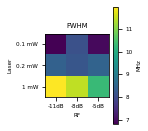

In [7]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 5.67})
cm = 1/2.54 
fig = plt.figure(figsize=(5*cm, 5*cm))

# Create a heatmap
img=plt.imshow(np.array(fwhm)/1e6, cmap='viridis')

# Add a colorbar
plt.colorbar(img, label='MHz')

# Set labels and title
plt.ylabel('Laser')
plt.xlabel('RF')
plt.title('FWHM')
plt.xticks([0, 1, 2], ['-11dB', '-8dB', '-5dB'])
plt.yticks([0, 1, 2], ['0.1 mW', '0.2 mW', '1 mW'])
# Set custom row and column labels
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])

# Show the plot
plt.tight_layout()
fig.savefig('fwhm.eps', format= 'eps',transparent=True)

In [8]:
fwhm[0][0]

6810183.25226376